# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install tensorflow scikit-learn seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-sc

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

In [2]:
#mounting the Google drive to access the datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import os
import numpy as np                                                                               # Importing numpy for matrix operations
import pandas as pd                                                                              # Importing pandas manipulate DataFrames
import matplotlib.pyplot as plt                                                                  # Importing matplotlib for plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs

#Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN models
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers for the models
from sklearn import preprocessing                                                                # Importing to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing to plot confusion matrices
from sklearn.metrics import classification_report                                                # Importing to plot classification reports for the models

#display images using OpenCV
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import cv2

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras import backend
import random
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# to display images in colab using OpenCV
from google.colab.patches import cv2_imshow

In [11]:
import warnings
warnings.filterwarnings('ignore')

#formating numeric data for easier readability
pd.set_option(
    "display.float_format", lambda x: "%.2f" % x
)  # to display numbers rounded to 2 decimal places

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Loading the dataset

In [8]:
# Uncomment and run the below code if you are using google colab
# from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
#loading the dataset of images
path1 = "/content/sample_data/images.npy"
images = np.load(path1)

#loading the dataset of labels
path2 = "/content/drive/MyDrive/Labels.csv"
labels = pd.read_csv(path2)

ValueError: Cannot load file containing pickled data when allow_pickle=False

## Data Overview

In [ ]:
print(images.shape)
print(type(images))

(4750, 128, 128, 3)
<class 'numpy.ndarray'>


**The dataset contains 4750 RGB images of the shape 128x128 pixels, each containing 3 channels**

In [ ]:
labels.sample(n=5)

,Label
3441,Sugar beet
3777,Maize
3527,Sugar beet
2321,Charlock
3493,Sugar beet


### Understand the shape of the dataset

In [ ]:
images.shape

(4750, 128, 128, 3)

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

In [ ]:
#setting the figure size for the visualizations
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,10

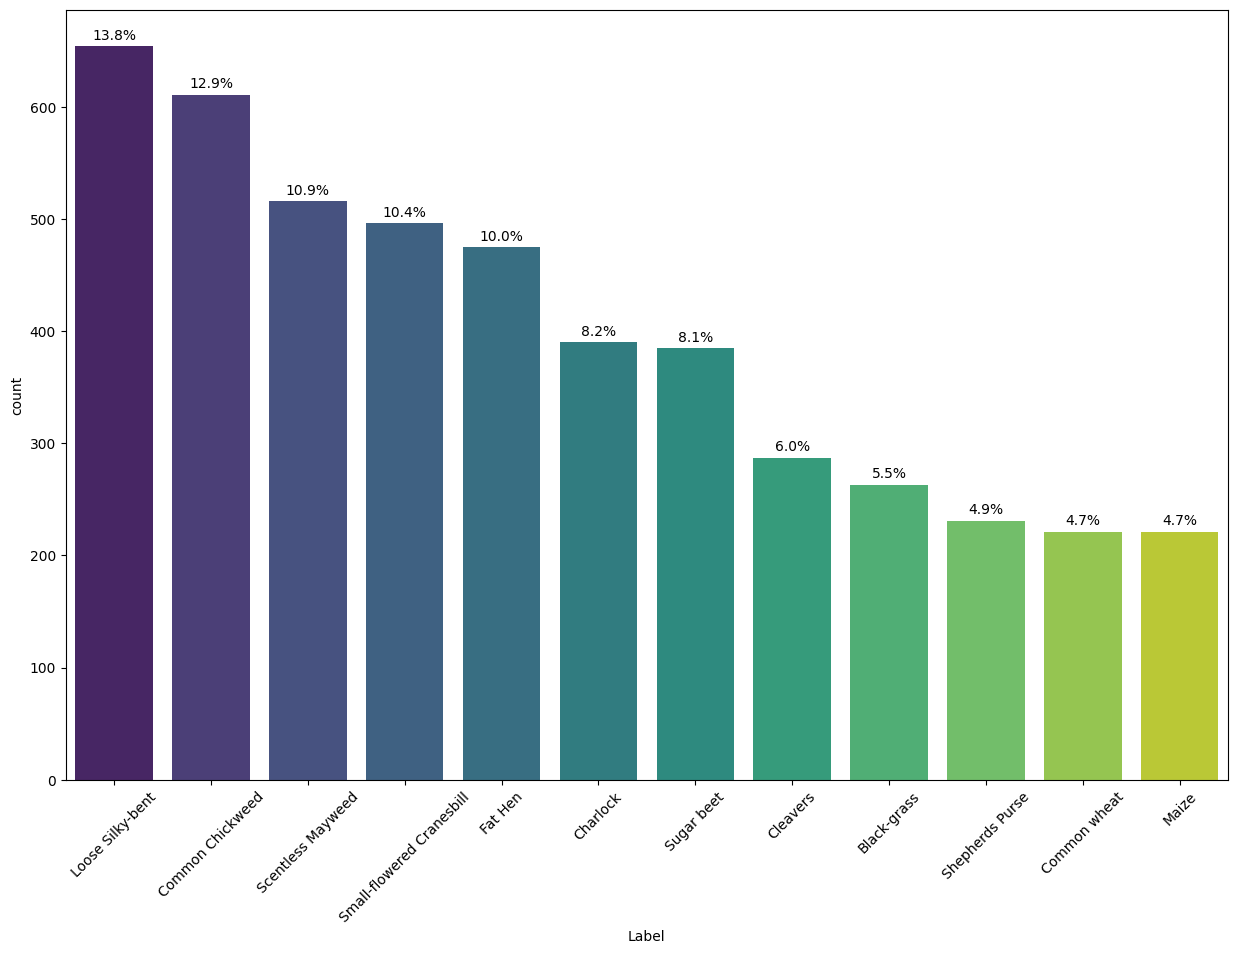

In [ ]:
#plotting the distribution of the number of each plant's images
ax = sns.countplot(data=labels, x="Label", palette='viridis', order = labels['Label'].value_counts().index)
total = float(len(images))
plt.xticks(rotation=45)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 6
    ax.annotate(percentage, (x, y), ha='center')
plt.show()

In [ ]:
#displaying how many images of each plant are in the dataset
labels.value_counts()

,count
Label,
Loose Silky-bent,654
Common Chickweed,611
Scentless Mayweed,516
Small-flowered Cranesbill,496
Fat Hen,475
Charlock,390
Sugar beet,385
Cleavers,287
Black-grass,263


Of the 12 types of plants in the dataset:

Two plants, loose silky-bents and common chickweeds, comprise over a quarter (~26%) of all images

The five plants with the most images comprise 58% of all images

The number of images for each plant ranges from 221 to 654, close to three times more images for the model to train with

Since the distribution of the number of images for each plant is not uniform, there is the potential for the CNN model to overfit for the more well-represented plants

Due to the nature of this project, this imbalance may also contribute to the model misclassifying less well-represented plants as better represented plants with similar shapes, colors, and other applicable traits

In [ ]:
#listing the names of each class of plant
classes = np.unique(labels).tolist()
classes

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [ ]:

#storing the number of classes in a variable
num_classes = len(classes)
num_classes

12

In [ ]:

def plot_images(images,labels):
  num_classes=12                                                                #setting the number of classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                    #obtaining the unique classes from labels
  rows = 3                                                                      #defining number of rows
  cols = 4                                                                      #defining number of columns
  fig = plt.figure(figsize=(15, 12))                                            #defining the figure size
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                      #generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                    #adding subplots
          ax.imshow(images[random_index, :])                                    #plotting the image
          ax.set_title(keys[random_index])
  plt.show()

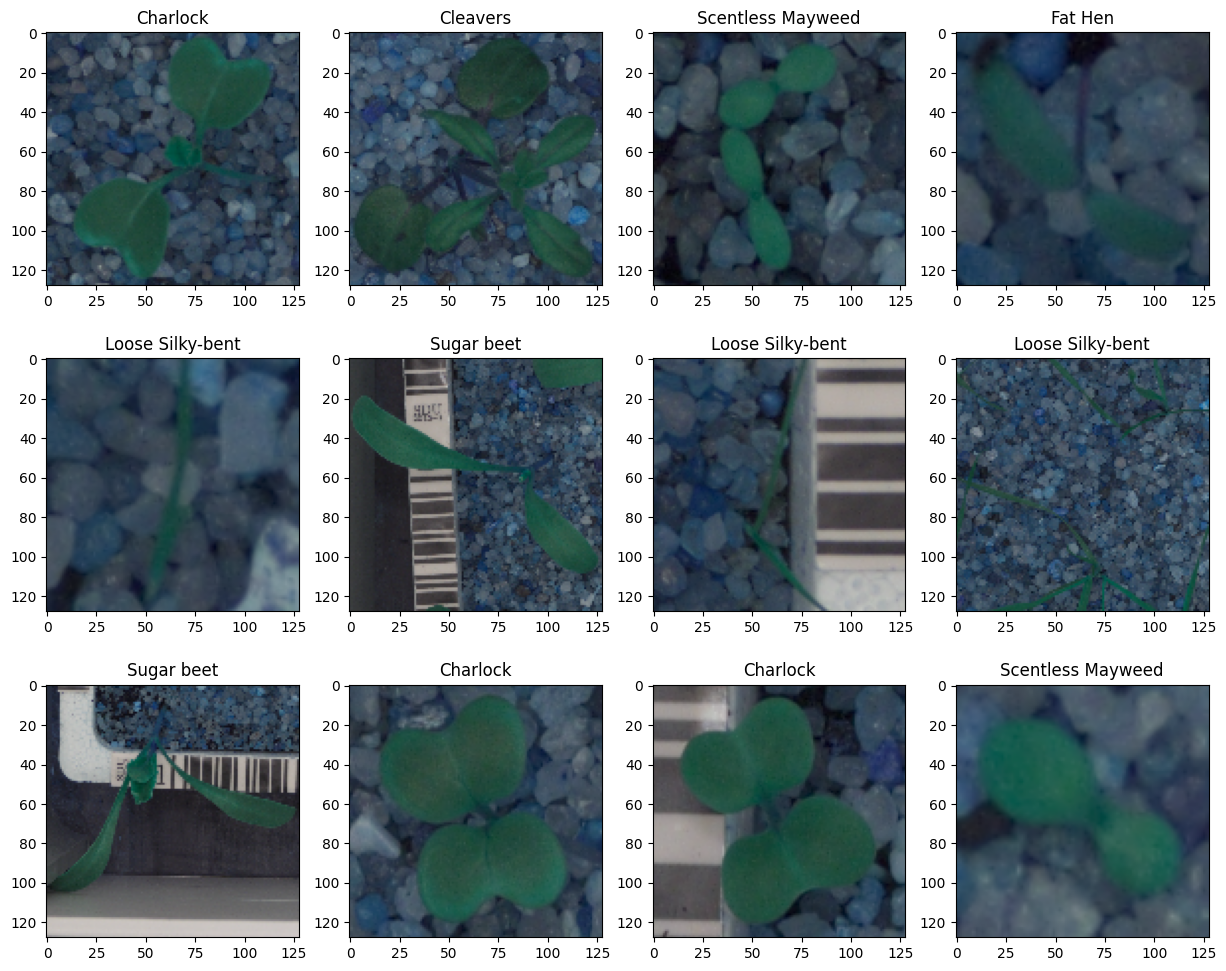

In [ ]:
#showing a sample of 12 images from the dataset
plot_images(images,labels)

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
  '''
  Barplot with percentage at the top
  data: dataframe
  feature: dataframe column
  perc:
  whether to display percentages instead of count (default is False)
  n: displays the top n category levels (defaul is None, i.e., display all levels)
  '''
  total = len(data[feature]) #length of the column
  count = data[feature].nunique()
  if n is None:
    plt.figure(figsize=(count + 2, 6))
  else:
    plt.figure(figsize=(n + 2, 6))
  plt.xticks(rotation=90, fontsize=15)
  ax = sns.countplot(
      data=data,
      x=feature,
      palette='Paired',
      order=data[feature].value_counts().index[:n]
  )
  for p in ax.patches:
    if perc == True:
      label = '{:.1f}%'.format(
          100*p.get_height()/total
      ) # percentage of each class of the category
    else:
      label = p.get_height() # count of each level of the category
    x = p.get_x() + p.get_width()/2 # width of the plot
    y = p.get_height() # height of the plot

    #annotate the percentage
    ax.annotate(
        label,
        (x, y),
        ha='center',
        va='center',
        size=12,
        xytext=(0,5),
        textcoords='offset points',
    )
plt.show()

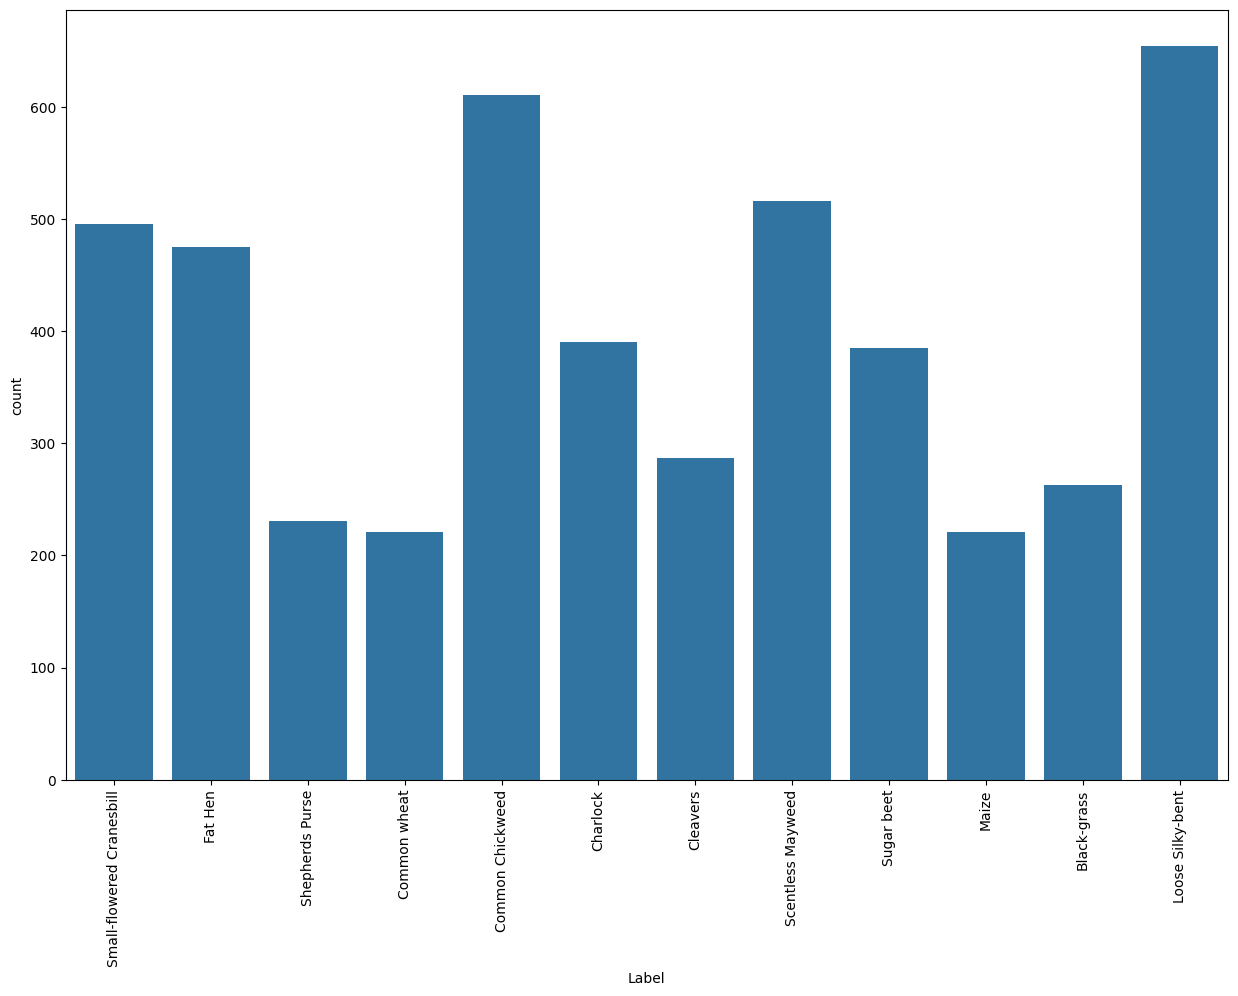

In [ ]:
# visualize the balance of the dataset
sns.countplot(data = labels, x='Label');
plt.xticks(rotation=90)
plt.show()

In [ ]:
# number of labels for each plant type
labels['Label'].value_counts()

,count
Label,
Loose Silky-bent,654
Common Chickweed,611
Scentless Mayweed,516
Small-flowered Cranesbill,496
Fat Hen,475
Charlock,390
Sugar beet,385
Cleavers,287
Black-grass,263


In [ ]:
# check the percentage of each label value
for i in labels['Label'].unique():
  print(i, ": ", (labels[labels['Label']==i].count()/labels.shape[0])*100, "\n")

Small-flowered Cranesbill :  Label   10.44
dtype: float64 

Fat Hen :  Label   10.00
dtype: float64 

Shepherds Purse :  Label   4.86
dtype: float64 

Common wheat :  Label   4.65
dtype: float64 

Common Chickweed :  Label   12.86
dtype: float64 

Charlock :  Label   8.21
dtype: float64 

Cleavers :  Label   6.04
dtype: float64 

Scentless Mayweed :  Label   10.86
dtype: float64 

Sugar beet :  Label   8.11
dtype: float64 

Maize :  Label   4.65
dtype: float64 

Black-grass :  Label   5.54
dtype: float64 

Loose Silky-bent :  Label   13.77
dtype: float64 



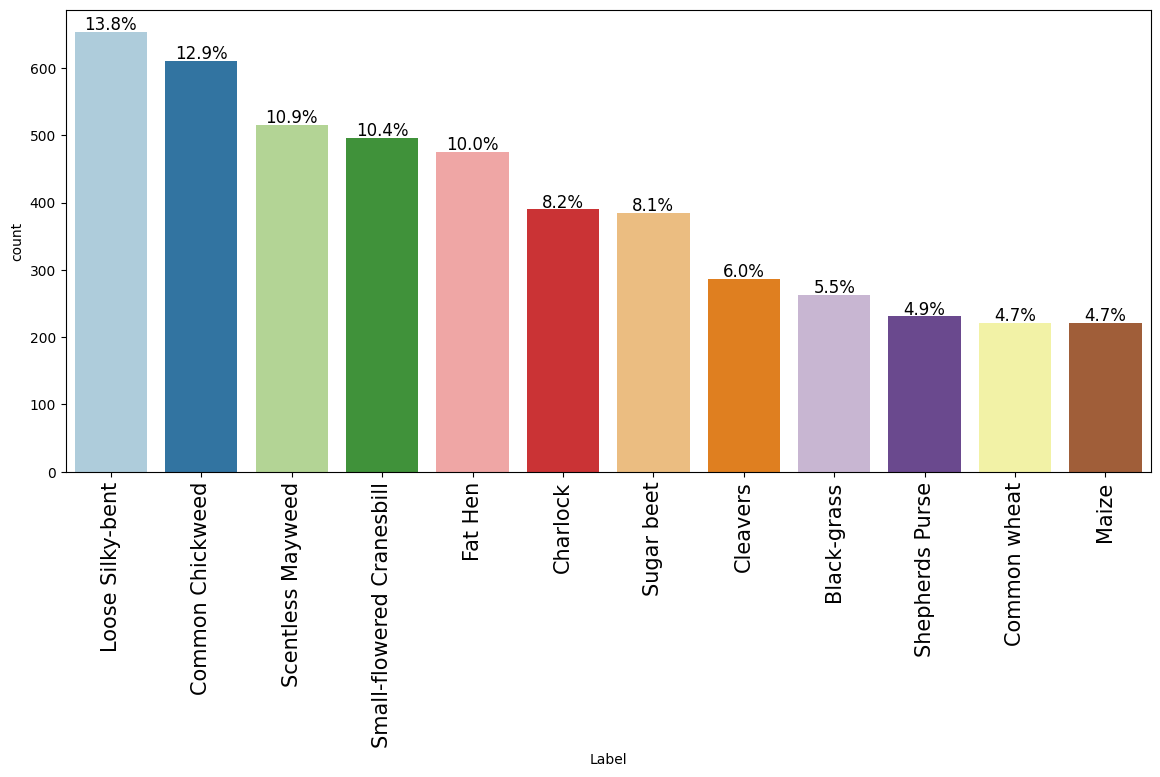

In [ ]:
# Visualize the balance/distribution of the label values.
labeled_barplot(labels, "Label", perc=True)

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [ ]:
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

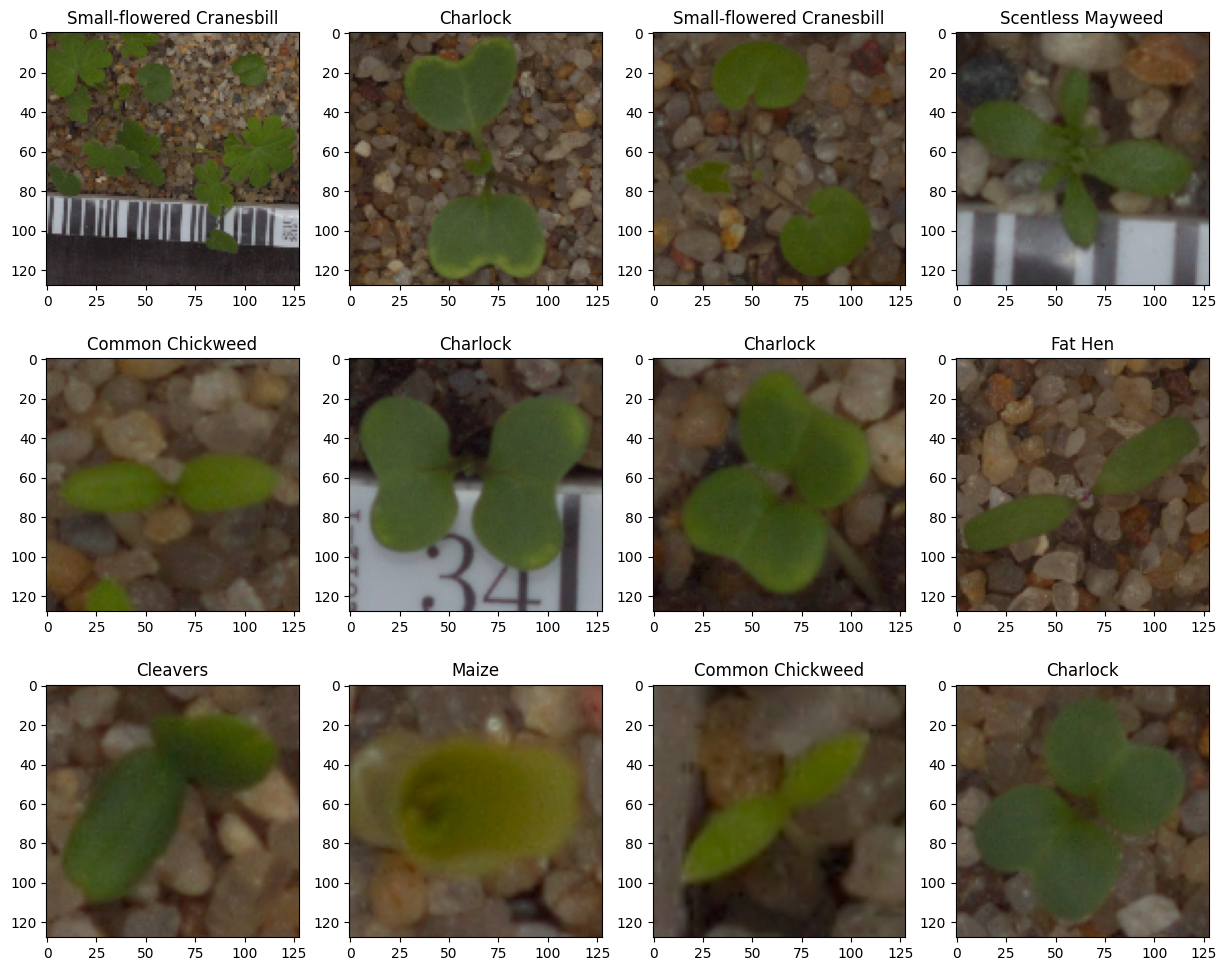

In [ ]:
plot_images(images, labels)

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
images_decreased = []
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append(cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

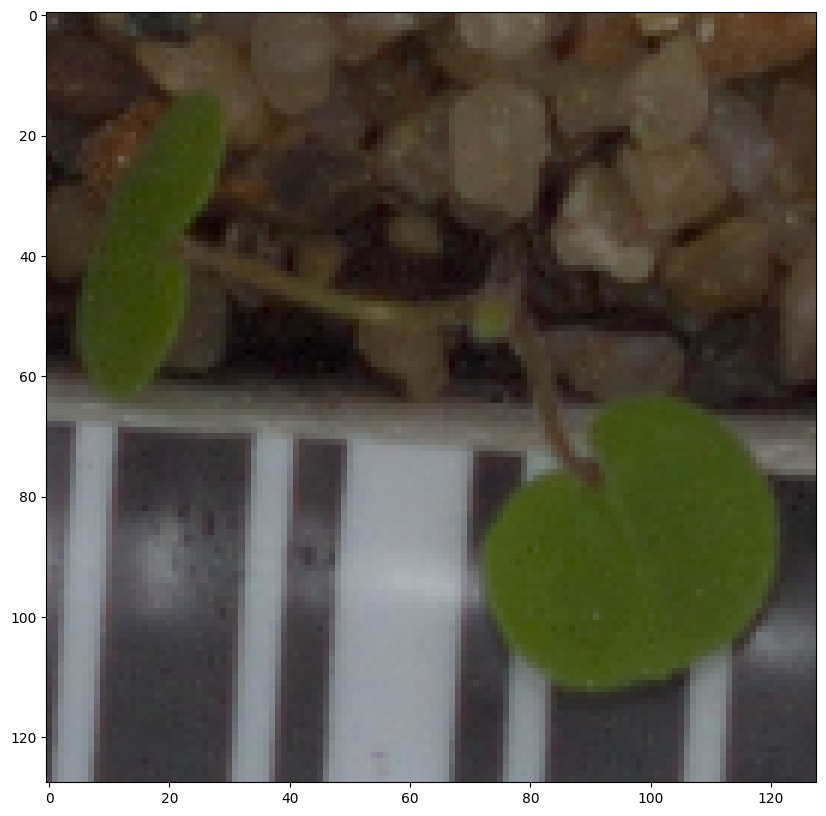

In [ ]:

plt.imshow(images[10])

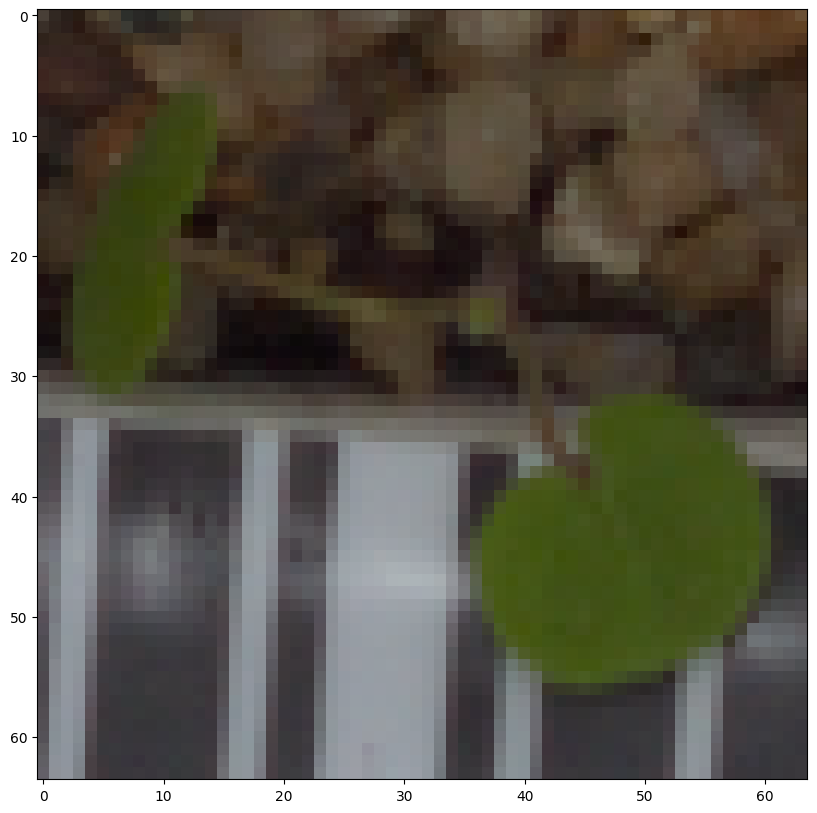

In [ ]:
plt.imshow(images_decreased[10])


The reduced images are slightly pixelated, will try a Gaussian Blur



In [ ]:
images_gb = []
for i in range(len(images_decreased)):
  images_gb.append(cv2.GaussianBlur(images_decreased[i], ksize=(3,3), sigmaX=0))

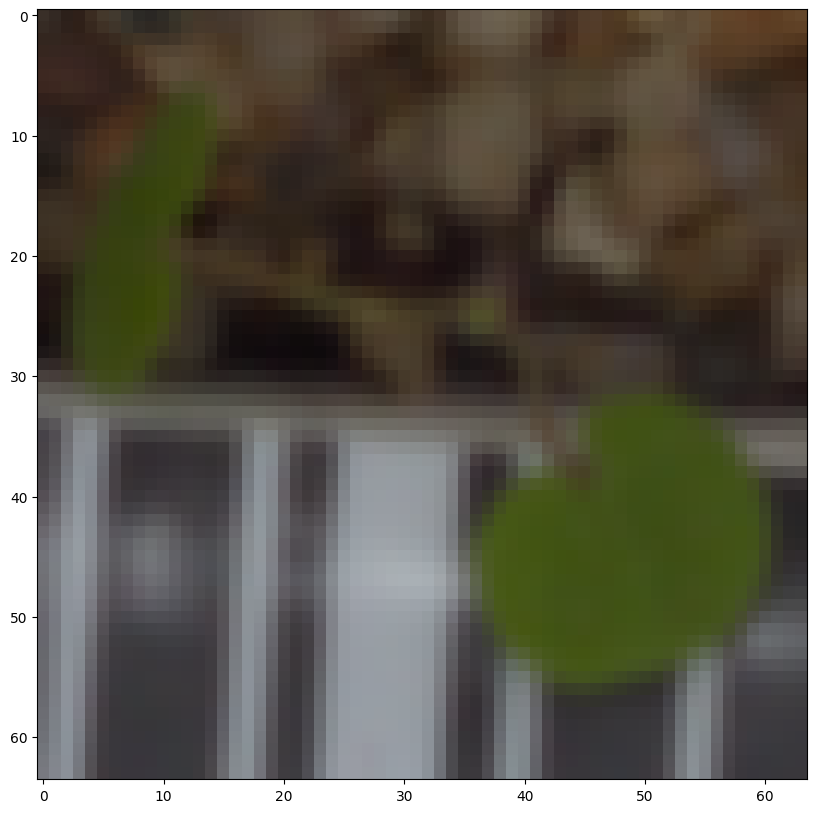

In [ ]:

plt.imshow(images_gb[10])

The Gaussian Blur has made the images less distinct, will use the images_decreased set for the initial model training.



### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased), labels, test_size=0.1, random_state=1, stratify=labels)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.1, random_state=1, stratify = y_temp)


In [ ]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (3847, 64, 64, 3)
y_train: (3847, 1)
X_val: (428, 64, 64, 3)
y_val: (428, 1)
X_test: (475, 64, 64, 3)
y_test: (475, 1)


### Encode the target labels

In [ ]:
from sklearn.preprocessing import LabelBinarizer


In [ ]:

# convert the labels from names to OHE vectors
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded = enc.transform(y_val)
y_test_encoded = enc.transform(y_test)

### Data Normalization

In [ ]:
# normalize the pixel values, convert from 0-255 to 0-1
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

In [ ]:
from tensorflow.keras import backend

In [ ]:
# clearing the backend and setting the seeds
backend.clear_session()

np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

The first, baseline model, will be a CNN without batch normalization or dropout. Depending on performance, will add these layers as necessary.

In [ ]:

# initialize the model as sequential
model1 = Sequential()

In [ ]:

# start with a conv layer
model1.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64,64,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model1.add(MaxPooling2D(2,2))

# flatten
model1.add(Flatten())

# ANN layers
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(16, activation='relu'))

#output layer
model1.add(Dense(12, activation='softmax'))

In [ ]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,292 (364.42 KB)

 Trainable params: 93,292 (364.42 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

history1 = model1.fit(X_train_normalized, y_train_encoded,
                    validation_data=(X_val_normalized, y_val_encoded),
                    epochs=10,
                    batch_size=32,
                    verbose=2
)

Epoch 1/10
121/121 - 20s - 167ms/step - accuracy: 0.1302 - loss: 2.4296 - val_accuracy: 0.2290 - val_loss: 2.2644
Epoch 2/10
121/121 - 6s - 52ms/step - accuracy: 0.3447 - loss: 1.9844 - val_accuracy: 0.3925 - val_loss: 1.8555
Epoch 3/10
121/121 - 1s - 6ms/step - accuracy: 0.4962 - loss: 1.4952 - val_accuracy: 0.5467 - val_loss: 1.4242
Epoch 4/10
121/121 - 1s - 6ms/step - accuracy: 0.5792 - loss: 1.1983 - val_accuracy: 0.6192 - val_loss: 1.2461
Epoch 5/10
121/121 - 1s - 10ms/step - accuracy: 0.6395 - loss: 1.0278 - val_accuracy: 0.6636 - val_loss: 1.1240
Epoch 6/10
121/121 - 1s - 11ms/step - accuracy: 0.6818 - loss: 0.9202 - val_accuracy: 0.6752 - val_loss: 1.0857
Epoch 7/10
121/121 - 1s - 9ms/step - accuracy: 0.7143 - loss: 0.8323 - val_accuracy: 0.6729 - val_loss: 1.0618
Epoch 8/10
121/121 - 1s - 6ms/step - accuracy: 0.7369 - loss: 0.7623 - val_accuracy: 0.6776 - val_loss: 1.0676
Epoch 9/10
121/121 - 1s - 5ms/step - accuracy: 0.7614 - loss: 0.6867 - val_accuracy: 0.6986 - val_loss: 1.

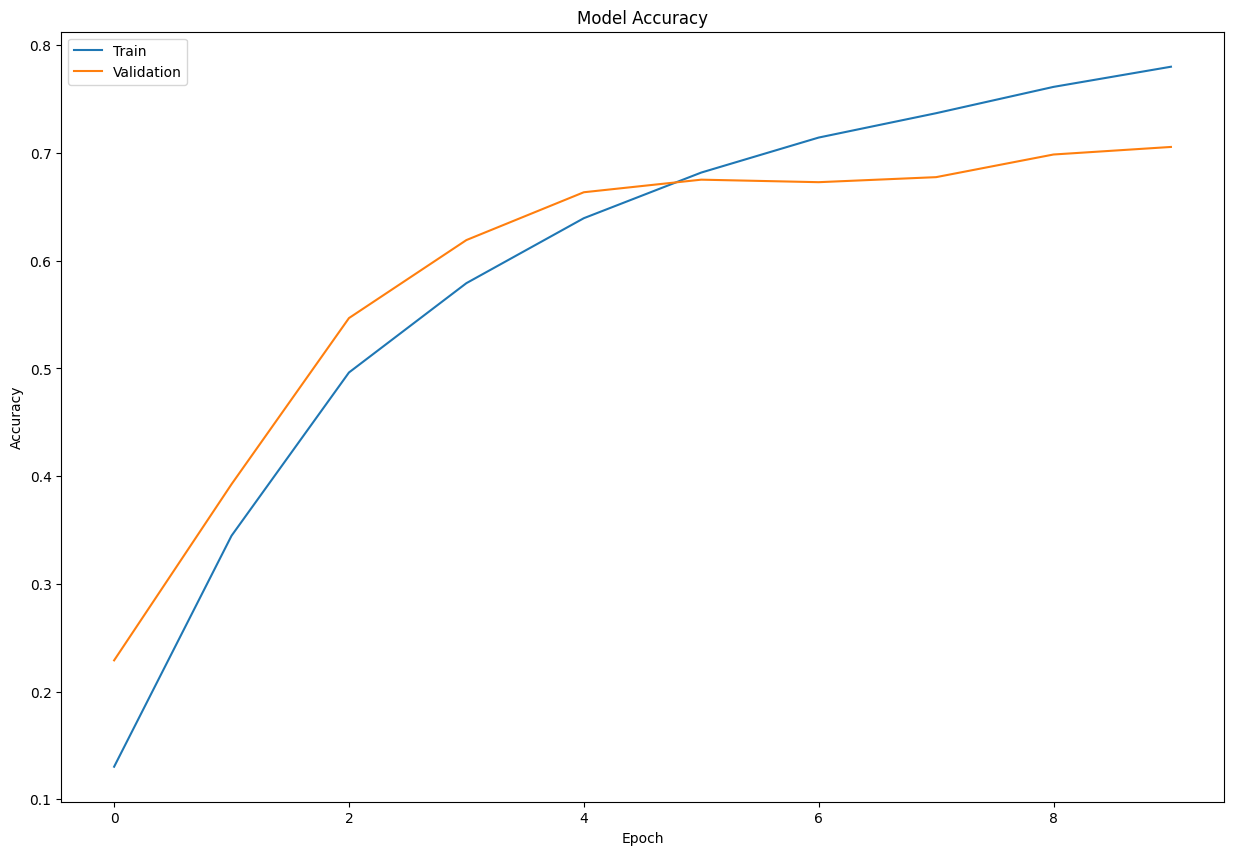

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)


15/15 - 1s - 59ms/step - accuracy: 0.7116 - loss: 0.8807


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


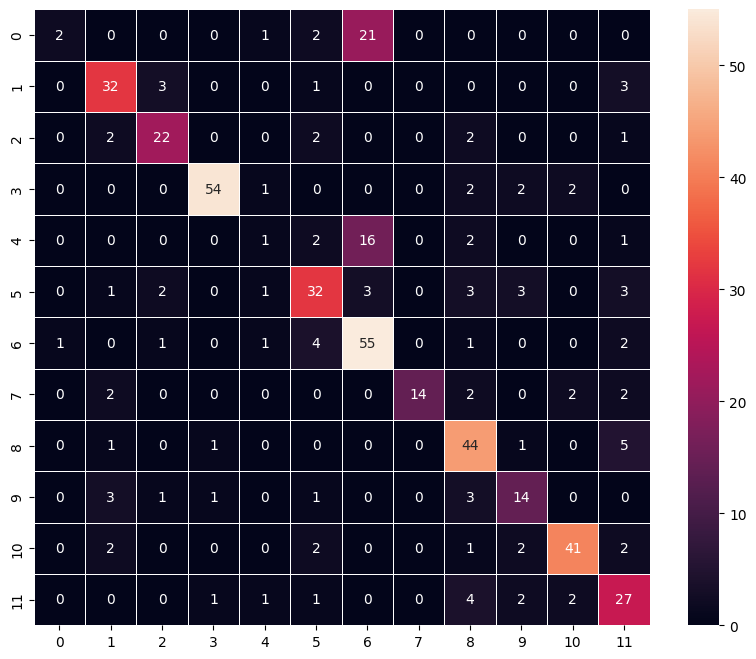

In [ ]:

y_pred1 = model1.predict(X_test_normalized)
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred1_arg=np.argmax(y_pred1,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred1_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [ ]:
cr1 =metrics.classification_report(y_test_arg,y_pred1_arg, output_dict=True)
f1_1 = cr1['macro avg']['f1-score']
acc_1 = cr1['accuracy']
print('f1-score:',f1_1)
print('Accuracy:', acc_1)

f1-score: 0.6371056386785358
Accuracy: 0.7115789473684211


The initial model trained nicely, it is a little over fit above 5 epochs, but accuracy is not great (71%).

Will try some Batch Norm and Dropout layers

In [ ]:
# clearing the backend and setting the seeds
backend.clear_session()

np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# initialize the model as sequential
model2 = Sequential()

In [ ]:
# start with a conv layer
model2.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64,64,3)))
model2.add(MaxPooling2D(2,2))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model2.add(MaxPooling2D(2,2))
model2.add(BatchNormalization())
model2.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model2.add(MaxPooling2D(2,2))
model2.add(BatchNormalization())

# flatten
model2.add(Flatten())

# ANN layers
model2.add(Dense(64, activation='relu'))
model2.add(Dropout((0.25)))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout((0.25)))
model2.add(Dense(16, activation='relu'))

#output layer
model2.add(Dense(12, activation='softmax'))

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,740 (366.17 KB)

 Trainable params: 93,516 (365.30 KB)

 Non-trainable params: 224 (896.00 B)

In [ ]:

history2 = model2.fit(X_train_normalized, y_train_encoded,
                    validation_data=(X_val_normalized, y_val_encoded),
                    epochs=50,
                    batch_size=32,
                    verbose=2,
)

Epoch 1/50
121/121 - 22s - 179ms/step - accuracy: 0.2173 - loss: 2.2867 - val_accuracy: 0.1379 - val_loss: 3.7254
Epoch 2/50
121/121 - 6s - 47ms/step - accuracy: 0.3787 - loss: 1.8152 - val_accuracy: 0.1379 - val_loss: 4.6051
Epoch 3/50
121/121 - 2s - 19ms/step - accuracy: 0.4856 - loss: 1.5052 - val_accuracy: 0.1542 - val_loss: 3.4327
Epoch 4/50
121/121 - 1s - 12ms/step - accuracy: 0.5586 - loss: 1.2826 - val_accuracy: 0.3318 - val_loss: 2.2043
Epoch 5/50
121/121 - 2s - 19ms/step - accuracy: 0.6356 - loss: 1.0843 - val_accuracy: 0.1799 - val_loss: 4.0104
Epoch 6/50
121/121 - 1s - 11ms/step - accuracy: 0.6782 - loss: 0.9494 - val_accuracy: 0.3528 - val_loss: 2.5110
Epoch 7/50
121/121 - 2s - 14ms/step - accuracy: 0.7211 - loss: 0.8234 - val_accuracy: 0.6986 - val_loss: 0.8903
Epoch 8/50
121/121 - 2s - 15ms/step - accuracy: 0.7468 - loss: 0.7604 - val_accuracy: 0.6425 - val_loss: 1.0698
Epoch 9/50
121/121 - 2s - 14ms/step - accuracy: 0.7694 - loss: 0.6810 - val_accuracy: 0.6799 - val_los

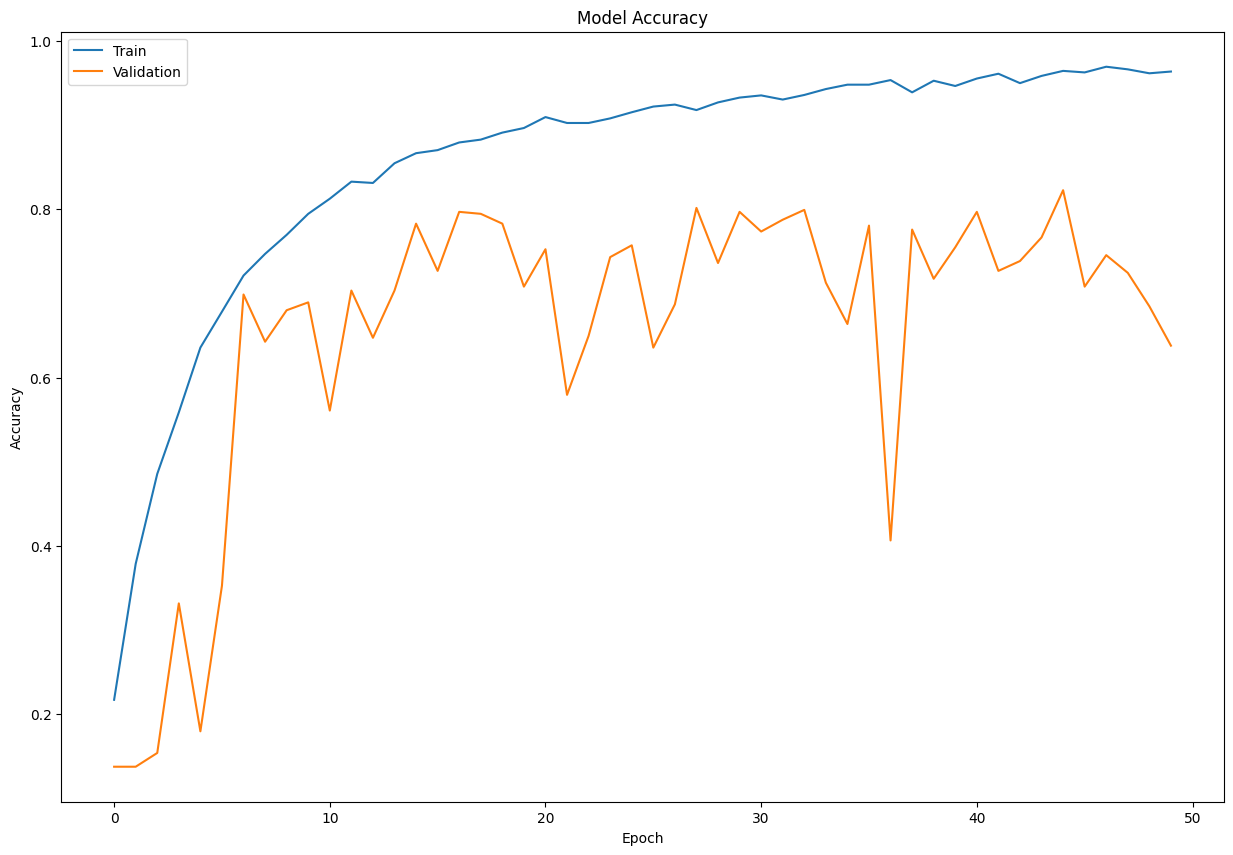

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)


15/15 - 1s - 48ms/step - accuracy: 0.6463 - loss: 2.3828


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


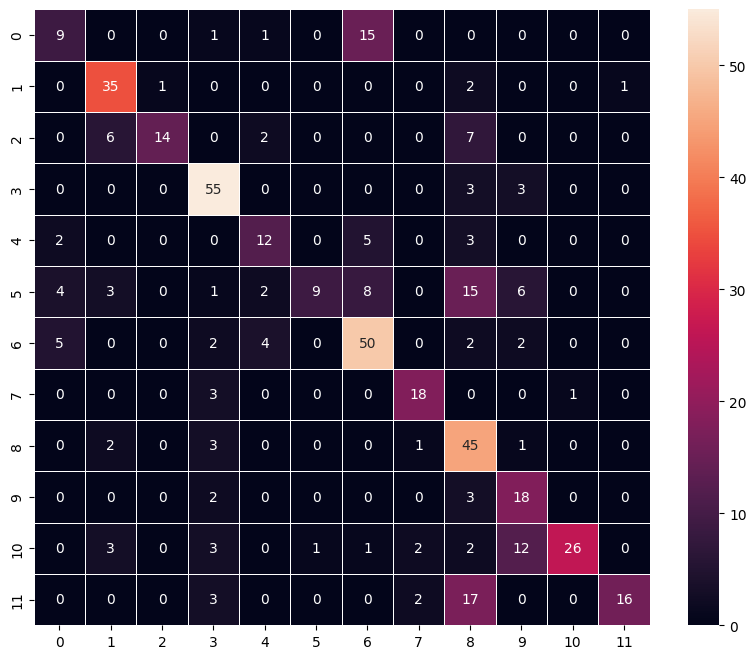

In [ ]:
y_pred2 = model2.predict(X_test_normalized)
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred2_arg=np.argmax(y_pred2,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred2_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()


In [ ]:
cr2 =metrics.classification_report(y_test_arg,y_pred2_arg, output_dict=True)
f1_2 = cr2['macro avg']['f1-score']
acc_2 = cr2['accuracy']
print('f1-score:',f1_2)
print('Accuracy:', acc_2)

f1-score: 0.6178301966668281
Accuracy: 0.6463157894736842


Adding Batch Normalization, Dropout, the accuracy improved to about 64%.

There was very little improvement after the 10th epoch

In [ ]:

# clearing the backend and setting the seeds
backend.clear_session()

np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# initialize the model as sequential
model3 = Sequential()

In [ ]:
# start with a conv layer
model3.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64,64,3)))
model3.add(MaxPooling2D(2,2))
model3.add(BatchNormalization())
model3.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model3.add(MaxPooling2D(2,2))
model3.add(BatchNormalization())
model3.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model3.add(MaxPooling2D(2,2))
model3.add(BatchNormalization())

# flatten
model3.add(Flatten())

# ANN layers
model3.add(Dense(64, activation='relu'))
model3.add(Dropout((0.25)))
model3.add(BatchNormalization())
model3.add(Dense(32, activation='relu'))
model3.add(Dropout((0.25)))
model3.add(BatchNormalization())
model3.add(Dense(32, activation='relu'))
model3.add(Dropout((0.25)))
model3.add(BatchNormalization())
model3.add(Dense(16, activation='relu'))
model3.add(BatchNormalization())
#output layer
model3.add(Dense(12, activation='softmax'))

In [ ]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32)                  │             1

 Total params: 95,372 (372.55 KB)

 Trainable params: 94,860 (370.55 KB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
history3 = model3.fit(X_train_normalized, y_train_encoded,
                    validation_data=(X_val_normalized, y_val_encoded),
                    epochs=50,
                    batch_size=32,
                    verbose=2,
                    )

Epoch 1/50
121/121 - 29s - 236ms/step - accuracy: 0.1240 - loss: 2.6493 - val_accuracy: 0.1308 - val_loss: 2.4563
Epoch 2/50
121/121 - 1s - 9ms/step - accuracy: 0.2649 - loss: 2.1672 - val_accuracy: 0.1379 - val_loss: 2.6308
Epoch 3/50
121/121 - 2s - 14ms/step - accuracy: 0.3501 - loss: 1.8899 - val_accuracy: 0.3458 - val_loss: 2.1038
Epoch 4/50
121/121 - 1s - 11ms/step - accuracy: 0.4229 - loss: 1.7097 - val_accuracy: 0.3107 - val_loss: 2.0537
Epoch 5/50
121/121 - 1s - 11ms/step - accuracy: 0.4705 - loss: 1.5767 - val_accuracy: 0.4463 - val_loss: 1.6298
Epoch 6/50
121/121 - 3s - 24ms/step - accuracy: 0.5199 - loss: 1.4549 - val_accuracy: 0.4696 - val_loss: 1.5410
Epoch 7/50
121/121 - 1s - 11ms/step - accuracy: 0.5061 - loss: 1.4446 - val_accuracy: 0.3294 - val_loss: 1.9456
Epoch 8/50
121/121 - 2s - 13ms/step - accuracy: 0.5482 - loss: 1.3225 - val_accuracy: 0.5888 - val_loss: 1.2001
Epoch 9/50
121/121 - 1s - 8ms/step - accuracy: 0.5849 - loss: 1.2479 - val_accuracy: 0.2687 - val_loss:

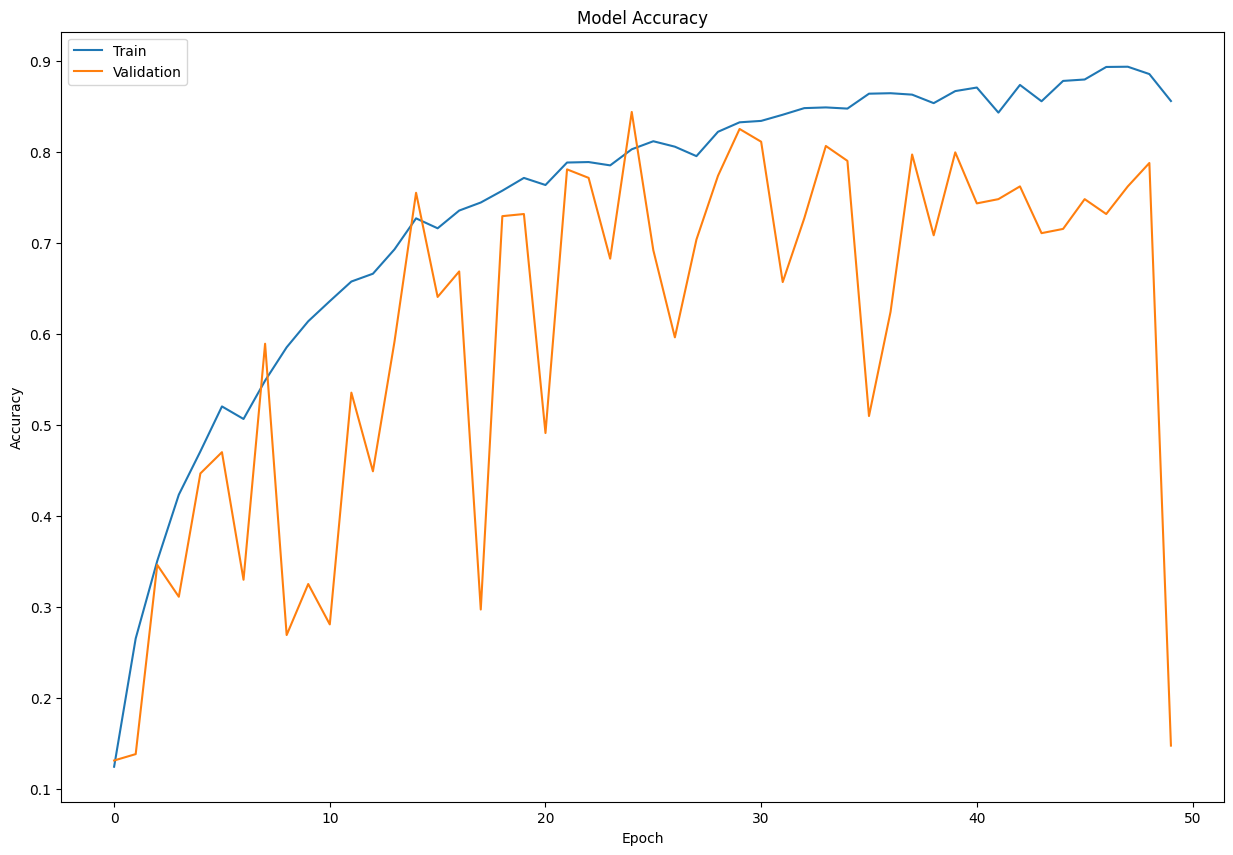

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model3.evaluate(X_test_normalized, y_test_encoded, verbose=2)


15/15 - 1s - 65ms/step - accuracy: 0.1368 - loss: 8.2532


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


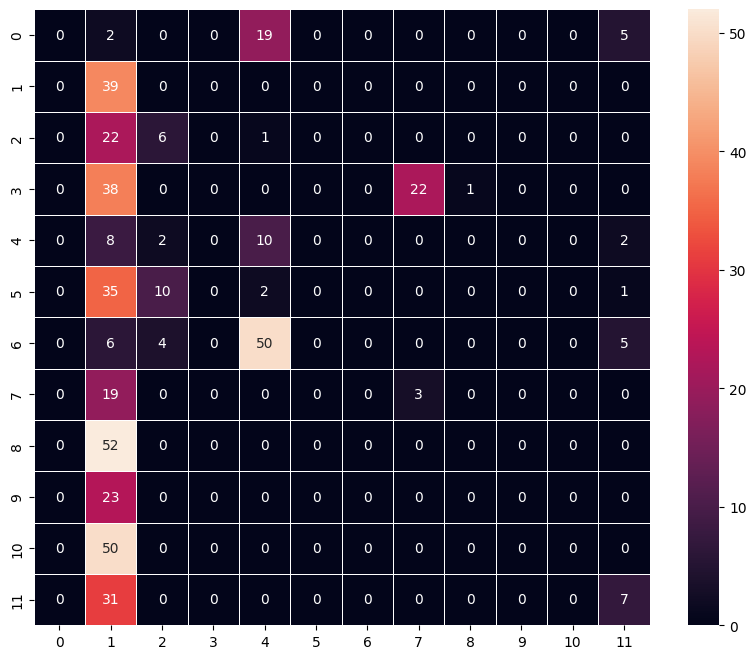

In [ ]:

y_pred3 = model3.predict(X_test_normalized)
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred3_arg=np.argmax(y_pred3,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred3_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [ ]:
cr3 =metrics.classification_report(y_test_arg,y_pred3_arg, output_dict=True)
f1_3 = cr3['macro avg']['f1-score']
acc_3 = cr3['accuracy']
print('f1-score:',f1_3)
print('Accuracy:', acc_3)

f1-score: 0.08424386742111484
Accuracy: 0.1368421052631579


## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
# clearing the backend and setting the seeds
backend.clear_session()

np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# initialize the model as sequential
model4 = Sequential()

In [ ]:
# start with a conv layer
model4.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64,64,3)))
model4.add(MaxPooling2D(2,2))
model4.add(BatchNormalization())
model4.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model4.add(MaxPooling2D(2,2))
model4.add(BatchNormalization())
model4.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model4.add(MaxPooling2D(2,2))
model4.add(BatchNormalization())

# flatten
model4.add(Flatten())

# ANN layers
model4.add(Dense(64, activation='relu'))
model4.add(Dropout((0.25)))
model4.add(Dense(32, activation='relu'))
model4.add(Dropout((0.25)))
model4.add(Dense(16, activation='relu'))

#output layer
model4.add(Dense(12, activation='softmax'))



In [ ]:
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,740 (366.17 KB)

 Trainable params: 93,516 (365.30 KB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=5,) #restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, mode='auto', min_delta=0.00001)
callbacks = (early_stop, reduce_lr)

history4 = model4.fit(X_train_normalized, y_train_encoded,
                    validation_data=(X_val_normalized, y_val_encoded),
                    epochs=50,
                    batch_size=32,
                    verbose=2,
                    callbacks=callbacks
)

Epoch 1/50
121/121 - 12s - 97ms/step - accuracy: 0.2184 - loss: 2.2903 - val_accuracy: 0.1379 - val_loss: 3.0072 - learning_rate: 0.0010
Epoch 2/50
121/121 - 1s - 7ms/step - accuracy: 0.3811 - loss: 1.8341 - val_accuracy: 0.1379 - val_loss: 4.0873 - learning_rate: 0.0010
Epoch 3/50
121/121 - 1s - 6ms/step - accuracy: 0.4754 - loss: 1.5009 - val_accuracy: 0.1379 - val_loss: 4.6065 - learning_rate: 0.0010
Epoch 4/50
121/121 - 1s - 6ms/step - accuracy: 0.5659 - loss: 1.2532 - val_accuracy: 0.1612 - val_loss: 3.5887 - learning_rate: 5.0000e-04
Epoch 5/50
121/121 - 1s - 10ms/step - accuracy: 0.6239 - loss: 1.0975 - val_accuracy: 0.2827 - val_loss: 2.1923 - learning_rate: 5.0000e-04
Epoch 6/50
121/121 - 1s - 10ms/step - accuracy: 0.6610 - loss: 0.9958 - val_accuracy: 0.6285 - val_loss: 1.0835 - learning_rate: 5.0000e-04
Epoch 7/50
121/121 - 1s - 6ms/step - accuracy: 0.6831 - loss: 0.8971 - val_accuracy: 0.6776 - val_loss: 1.0303 - learning_rate: 5.0000e-04
Epoch 8/50
121/121 - 1s - 6ms/step 

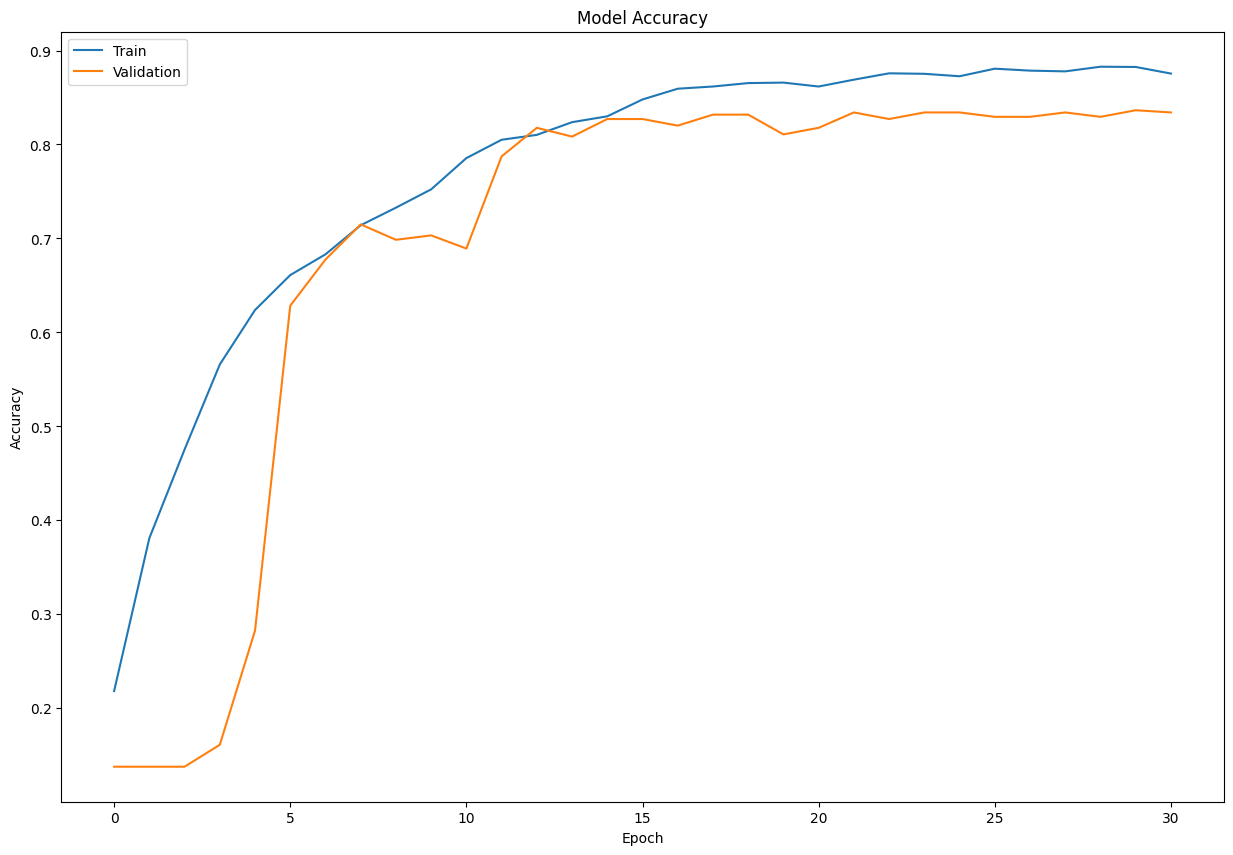

In [ ]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model4.evaluate(X_test_normalized, y_test_encoded, verbose=2)


15/15 - 0s - 27ms/step - accuracy: 0.8400 - loss: 0.5796


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


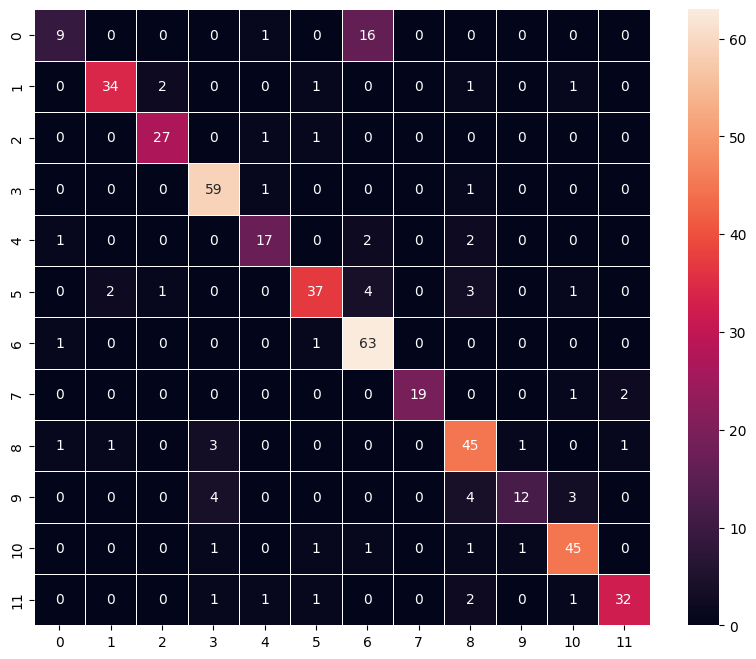

In [ ]:
y_pred4 = model4.predict(X_test_normalized)
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred4_arg=np.argmax(y_pred4,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred4_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [ ]:
cr4 =metrics.classification_report(y_test_arg,y_pred4_arg, output_dict=True)
f1_4 = cr4['macro avg']['f1-score']
acc_4 = cr4['accuracy']
print('f1-score:',f1_4)
print('Accuracy:', acc_4)

f1-score: 0.8159262460432947
Accuracy: 0.84


In [ ]:
# clearing the backend and setting the seeds
backend.clear_session()

np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
datagen = ImageDataGenerator (horizontal_flip=True,
                                    vertical_flip=False,
                                    height_shift_range=0.1,
                                    width_shift_range=0.1,
                                    rotation_range=90,
                                    zoom_range=0.1,
                                    )


In [ ]:
model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
model_vgg.summary()

#alternatively if you are NOT taking all CNN layers and dropping only the fully connected side:
# this will let you specify the up-to-and-include cnn layer you want
# in this case 'block5_pool' is the last layer, so both options will return the same, but you can adjust the layer arg
# xfer_layer = model_vgg.get_layer('block5_pool')
# model_vgg = Model(inputs=model_vgg.input, outputs=xfer_layer.output)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Freeze all of the VGG layers so they are non-trainable
for layer in model_vgg.layers:
  layer.trainable=False

In [ ]:
# verify that the xfered layers are frozen so they won't be retrained
for layer in model_vgg.layers:
  print(layer.name, layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [ ]:
# clearing the backend and setting the seeds
backend.clear_session()

np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
model6 = Sequential()

#start with the pre-trained vgg layers
model6.add(model_vgg)

# Flatten
model6.add(Flatten())

# add the dense layers from model4 above
# ANN layers
model6.add(Dense(64, activation='relu'))
model6.add(Dropout((0.25)))
model6.add(Dense(32, activation='relu'))
model6.add(Dropout((0.25)))
model6.add(Dense(16, activation='relu'))

#output layer
model6.add(Dense(12, activation='softmax'))

In [ ]:

# clearing the backend and setting the seeds
backend.clear_session()

np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
model7 = Sequential()

#start with the pre-trained vgg layers
model7.add(model_vgg)

# conv layers from model4
model7.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model7.add(MaxPooling2D(2,2))
model7.add(BatchNormalization())
model7.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model7.add(MaxPooling2D(2,2))
model7.add(BatchNormalization())
model7.add(Conv2D(16, (3,3), activation='relu', padding='same'))
# model7.add(MaxPooling2D(2,2))
model7.add(BatchNormalization())
# Flatten
model7.add(Flatten())

# add the dense layers from model4 above
# ANN layers
model7.add(Dense(64, activation='relu'))
model7.add(Dropout((0.25)))
model7.add(Dense(32, activation='relu'))
model7.add(Dropout((0.25)))
model7.add(Dense(16, activation='relu'))

#output layer
model7.add(Dense(12, activation='softmax'))


# compile with parameters from model4 above
model7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model7.summary()

## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

In [ ]:
cnn_compare = pd.DataFrame({'Model1':[f1_1, acc_1],
                            'Model2':[f1_2, acc_2],
                            'Model3':[f1_3, acc_3],
                            'Model4':[f1_4, acc_4]},
                            index=['f1', 'acc'])
cnn_compare

,Model1,Model2,Model3,Model4
f1,0.64,0.62,0.08,0.82
acc,0.71,0.65,0.14,0.84


### Visualizing the prediction

In [ ]:
accuracy = model4.evaluate(X_test_normalized, y_test_encoded, verbose=2)


15/15 - 0s - 8ms/step - accuracy: 0.8295 - loss: 0.5866


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


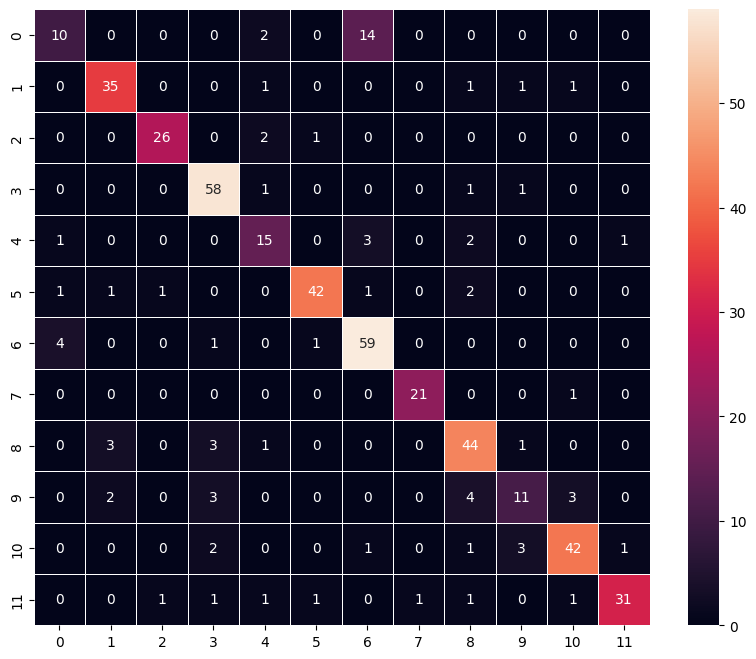

In [ ]:
y_pred4 = model4.predict(X_test_normalized)
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred4_arg=np.argmax(y_pred4,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred4_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

## Actionable Insights and Business Recommendations

**I recommend using model 4. It is accurate to between 76 and 80%, which will drastically reduce the amount of manual classification work for farmers. This model has the added benefit of requiring little image preprocessing and no costly data augmentation.**
This model could be integrated with automatic weeding systems, allowing weeds to be targeted over crops, reduce the amount of pesticides used overall, and lead to more eco-friendly farming.
Creating a mobile application for farmers could allow them to quickly identify an unknown plant from a photograph, allowing them to make decisions immediately.

_____